In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import scipy.stats as st
from scipy import stats

np.random.seed(41)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
RANDOM_SEED = 110011

In [2]:
# Read pre-processed data
adata_train = sc.read_h5ad('../../data/GSE_158055_COVID19_TRAIN.h5ad')
adata_test = sc.read_h5ad('../../data/GSE_158055_COVID19_TEST.h5ad')

In [3]:
adata_train

AnnData object with n_obs × n_vars = 378612 × 27943
    obs: 'celltype', 'majorType', 'sampleID', 'PatientID', 'datasets', 'City', 'Age', 'Sex', 'Sample type', 'CoVID-19 severity', 'Sample time', 'Sampling day (Days after symptom onset)', 'SARS-CoV-2', 'Single cell sequencing platform', 'BCR single cell sequencing', 'TCR single cell sequencing', 'Outcome', 'Comorbidities', 'COVID-19-related medication and anti-microbials', 'Leukocytes [G/L]', 'Neutrophils [G/L]', 'Lymphocytes [G/L]', 'Unpublished', 'sampleID_label', 'contain_y_train'
    uns: 'neighbors', 'pca', 'sampleID_label_colors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'har_emb'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
adata_train.obs

,celltype,majorType,sampleID,PatientID,datasets,City,Age,Sex,Sample type,CoVID-19 severity,...,TCR single cell sequencing,Outcome,Comorbidities,COVID-19-related medication and anti-microbials,Leukocytes [G/L],Neutrophils [G/L],Lymphocytes [G/L],Unpublished,sampleID_label,contain_y_train
AACAGGGGTCGGATTT-0,Mono_c1-CD14-CCL3,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True
AACCAACGTCCGAAAG-0,B_c02-MS4A1-CD27,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True
AACCTTTGTAGCACGA-0,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True
AAGCATCTCTATCGCC-0,Mono_c2-CD14-HLA-DPB1,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True
AATCACGGTCATAAAG-0,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,No,discharged,none,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCACAAACC-280,T_CD4_c05-FOS,CD4,S-S050,P-S050,d17,Beijing,69,M,frozen PBMC,severe/critical,...,Yes,discharged,Cardiovascular diseases,"Methylprednisolone, Traditional Chinese medicine",unknown,unknown,unknown,Yes,S-S050_severe/critical,True
TTTGTCATCACTCTTA-280,Mono_c1-CD14-CCL3,Mono,S-S050,P-S050,d17,Beijing,69,M,frozen PBMC,severe/critical,...,Yes,discharged,Cardiovascular diseases,"Methylprednisolone, Traditional Chinese medicine",unknown,unknown,unknown,Yes,S-S050_severe/critical,True
TTTGTCATCAGAGGTG-280,T_CD4_c05-FOS,CD4,S-S050,P-S050,d17,Beijing,69,M,frozen PBMC,severe/critical,...,Yes,discharged,Cardiovascular diseases,"Methylprednisolone, Traditional Chinese medicine",unknown,unknown,unknown,Yes,S-S050_severe/critical,True
TTTGTCATCAGCATGT-280,Mono_c1-CD14-CCL3,Mono,S-S050,P-S050,d17,Beijing,69,M,frozen PBMC,severe/critical,...,Yes,discharged,Cardiovascular diseases,"Methylprednisolone, Traditional Chinese medicine",unknown,unknown,unknown,Yes,S-S050_severe/critical,True


In [5]:
adata_test.obs['CoVID-19 severity'].unique()

['control', 'mild/moderate', 'severe/critical']
Categories (3, object): ['control', 'mild/moderate', 'severe/critical']

In [6]:
adata_concat = adata_train.concatenate(adata_test, batch_categories=['ref', 'new'])
adata = adata_concat.copy()

/home/dozonok/anaconda3/envs/workshop_scanpy_2/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [7]:
del adata_concat

### Add a new columns: covid_non_covid to adata.obs

This allows us to visualize clusters in UMAP with only a covid patients and non-covid patients.

In [8]:
for index, row in adata.obs.iterrows():
     if 'severe/critical' in row['CoVID-19 severity'] or 'mild/moderate' in row['CoVID-19 severity']:
          new_value = 'covid'
     elif 'control' in row['CoVID-19 severity']:
          new_value = 'non_covid'

     adata.obs.at[index, 'covid_non_covid'] = new_value

In [9]:
print('Number of cells of all samples in covid and non covid.')
print(adata.obs['covid_non_covid'].value_counts())

Number of cells of all samples in covid and non covid.
covid        320668
non_covid    165000
Name: covid_non_covid, dtype: int64


## Sample Classification: Scenario 1

### Input data
UMAP representation (UMAP 1 - UMAP 2)

### Method
Get KDEs of covid and non-covid from UMAP representation (UMAP1~2), and compare them with a new sample cluster’s KDE by KL-divergence.


* Sample for making KDE of covid and non-covid: Sample obtained from `train_test_split` (80% of the total samples)
* Sample to measure how similar to two KDEs: Sample obtained from `train_test_split` (20% of the total samples)


### Hypothesis
There should be similarity between covid samples in KDE, and difference compared to non-covid samples. 

### Get PDE and KDE from UMAP representation in sample making KDE of covid and non-covid

In [10]:
adata.obs

/home/dozonok/anaconda3/envs/workshop_scanpy_2/lib/python3.8/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/home/dozonok/anaconda3/envs/workshop_scanpy_2/lib/python3.8/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,celltype,majorType,sampleID,PatientID,datasets,City,Age,Sex,Sample type,CoVID-19 severity,...,COVID-19-related medication and anti-microbials,Leukocytes [G/L],Neutrophils [G/L],Lymphocytes [G/L],Unpublished,sampleID_label,contain_y_train,contain_y_test,batch,covid_non_covid
AACAGGGGTCGGATTT-0-ref,Mono_c1-CD14-CCL3,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True,NaN,ref,covid
AACCAACGTCCGAAAG-0-ref,B_c02-MS4A1-CD27,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True,NaN,ref,covid
AACCTTTGTAGCACGA-0-ref,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True,NaN,ref,covid
AAGCATCTCTATCGCC-0-ref,Mono_c2-CD14-HLA-DPB1,Mono,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True,NaN,ref,covid
AATCACGGTCATAAAG-0-ref,B_c01-TCL1A,B,S-S070-1,P-S070,d01,Zhuhai,32,F,frozen PBMC,severe/critical,...,"Moxifloxacin, Lopinavir/ ritonavir tablet, Chl...",2.8,1.92,0.61,PMID: 32759967,S-S070-1_severe/critical,True,NaN,ref,covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATTGGCGC-250-new,T_CD4_c08-GZMK-FOS_h,CD4,S-HC022,P-HC022,d15,Huanggang,30,M,fresh PBMC,control,...,control,control,control,control,Yes,S-HC022_control,False,True,new,non_covid
TTTGTCAGTAATCACC-250-new,Mono_c2-CD14-HLA-DPB1,Mono,S-HC022,P-HC022,d15,Huanggang,30,M,fresh PBMC,control,...,control,control,control,control,Yes,S-HC022_control,False,True,new,non_covid
TTTGTCAGTCTTCTCG-250-new,NK_c01-FCGR3A,NK,S-HC022,P-HC022,d15,Huanggang,30,M,fresh PBMC,control,...,control,control,control,control,Yes,S-HC022_control,False,True,new,non_covid
TTTGTCAGTTGTTTGG-250-new,T_CD4_c03-ITGA4,CD4,S-HC022,P-HC022,d15,Huanggang,30,M,fresh PBMC,control,...,control,control,control,control,Yes,S-HC022_control,False,True,new,non_covid


In [11]:
basis_values = adata.obsm['X_umap']

sample_vector = adata.obs['sampleID_label'].values
covid_non_covid_vector = adata.obs['covid_non_covid'].values
batch_vector = adata.obs['batch'].values


df_pds = pd.DataFrame(list(zip(basis_values, sample_vector, batch_vector, covid_non_covid_vector)),
               columns =['basis_value', 'sample', 'batch', 'covid_non_covid'])

In [12]:
del basis_values
del sample_vector
del covid_non_covid_vector
del batch_vector

Get covid vectors and non-covid vectors from UMAP representation on the train (existing sample) data.

In [17]:
ext_covid_vector = df_pds.query("batch == 'ref' and not sample.str.contains('control')")['basis_value'].values
ext_non_covid_vector = df_pds.query("batch == 'ref' and sample.str.contains('control')")['basis_value'].values

new_covid_vector = []

for v in ext_covid_vector:
    new_covid_vector.append(list(v))

new_non_covid_vector = []

for v in ext_non_covid_vector:
    new_non_covid_vector.append(list(v))

ext_covid_vector = np.array(new_covid_vector)
ext_non_covid_vector = np.array(new_non_covid_vector)

print(f"Number of cells from selected covid samples: {len(ext_covid_vector)}")
print(f"Number of cells from selected non-covid samples: {len(ext_non_covid_vector)}")

Number of cells from selected covid samples: 242809
Number of cells from selected non-covid samples: 135803


In [18]:
x_covid = ext_covid_vector[:, 0]
y_covid = ext_covid_vector[:, 1]
x_n_covid = ext_non_covid_vector[:, 0]
y_n_covid = ext_non_covid_vector[:, 1]

# now determine nice limits by hand:
#binwidth = 0.25
binwidth = 1
xymax = np.max([np.max(np.fabs(x_covid)), np.max(np.fabs(y_covid))])
lim = (int(xymax/binwidth) + 1) * binwidth

kernel_x_covid = stats.gaussian_kde(x_covid)
kernel_y_covid = stats.gaussian_kde(y_covid)
kernel_x_n_covid = stats.gaussian_kde(x_n_covid)
kernel_y_n_covid = stats.gaussian_kde(y_n_covid)
n_sample_covid = np.linspace(-lim+5, lim+5, len(ext_covid_vector)) #(start, stop, num=50 -> Number of samples to generate. Default is 50. Must be non-negative)
#n_sample_non_covid = np.linspace(-lim+5, lim+5, len(ext_covid_vector)) #(start, stop, num=50 -> Number of samples to generate. Default is 50. Must be non-negative)

# KDE for UMAP1 (x-axis)
kde_x_covid = kernel_x_covid(n_sample_covid)
kde_x_n_covid = kernel_x_n_covid(n_sample_covid)

# KDE for UMAP2 (y-axis)
kde_y_covid = kernel_y_covid(n_sample_covid)
kde_y_n_covid = kernel_y_n_covid(n_sample_covid)

Text(0.5, 1.0, 'KDE in UMAP2')

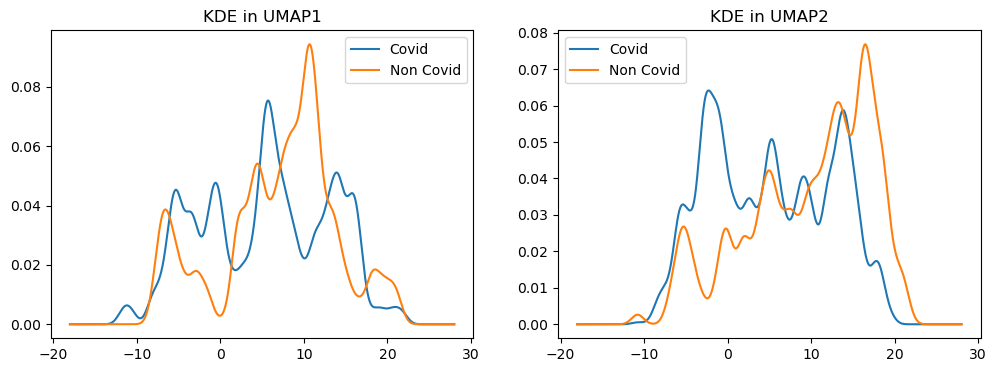

In [19]:
# Initialise the subplot function using number of rows and columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# For Covid KDE
ax1.plot(n_sample_covid, kde_x_covid, label='Covid')
ax1.plot(n_sample_covid, kde_x_n_covid, label='Non Covid')
ax1.legend()
ax1.set_title("KDE in UMAP1")

ax2.plot(n_sample_covid, kde_y_covid, label='Covid')
ax2.plot(n_sample_covid, kde_y_n_covid, label='Non Covid')
ax2.legend()
ax2.set_title("KDE in UMAP2")


### Plotting samples to measure how similar to two KDEs (UMAP1 and UMAP2) in test (new) samples

First, getting the vector of test samples from the UMAP representation.

In [22]:
y_test = df_pds.query("batch == 'new'")['sample'].unique()

In [23]:
dict_sample_vec = {} #Key: sample_name, value: basis value as [UMAP1, UMAP2]

for s in y_test:
    dict_sample_vec[s] = np.stack(list(df_pds.query(f"sample == '{s}'")['basis_value'].values[:]))
    print(f"Sample: {s}, size of vecor {len(dict_sample_vec[s])}")

Sample: S-HC018-1_control, size of vecor 2530
Sample: S-M074-1_mild/moderate, size of vecor 3032
Sample: S-S089-1_severe/critical, size of vecor 1934
Sample: S-S085-2_severe/critical, size of vecor 12592
Sample: S-HC001_control, size of vecor 8767
Sample: S-M015_mild/moderate, size of vecor 8962
Sample: S-M004-5_mild/moderate, size of vecor 9225
Sample: S-S021-4_severe/critical, size of vecor 4282
Sample: S-S019_severe/critical, size of vecor 5699
Sample: S-S031_severe/critical, size of vecor 5966
Sample: S-M030_mild/moderate, size of vecor 9049
Sample: S-M032_mild/moderate, size of vecor 7858
Sample: S-M038_mild/moderate, size of vecor 8408
Sample: S-HC007_control, size of vecor 7074
Sample: S-S008_severe/critical, size of vecor 579
Sample: S-S011-2_severe/critical, size of vecor 273
Sample: S-HC021_control, size of vecor 5966
Sample: S-HC022_control, size of vecor 4860


In [24]:
import numpy as np  
from scipy.stats import norm  
from matplotlib import pyplot as plt

#compute KL Divergence
"""KL Divergence(P|Q)"""
def KL_div(p_probs, q_probs):    
    KL_div = p_probs * np.log(p_probs / q_probs)
    return np.sum(KL_div)

result_UMAP1_pred = dict() # Key: sample_name, value: #[Comparison with the exsiting covid sample, Comarison with existing non-covid sample]
result_pred = dict() # Key: sample_name, value: #[Avg of the exsiting covid sample's KL-divergence score between UMAP1 and UMAP2, Avg of the exsiting non-covid sample's KL-divergence score between UMAP1 and UMAP2]

#### A. Compare the existing sample distributions with the test sample distributions based on KL-divergence.

Existing sample: covid, Test sample: S-HC018-1_control in UMAP1, KL-divergence: 5646.293101566225
Existing sample: non_covid, Test sample: S-HC018-1_control in UMAP1, KL-divergence: 5185.6977425413015
Existing sample: covid, Test sample: S-HC018-1_control in UMAP2, KL-divergence: 3349.545534579779
Existing sample: non_covid, Test sample: S-HC018-1_control in UMAP2, KL-divergence: 6776.576779346337
Existing sample: covid, Test sample: S-M074-1_mild/moderate in UMAP1, KL-divergence: 2638.177500185614
Existing sample: non_covid, Test sample: S-M074-1_mild/moderate in UMAP1, KL-divergence: 5080.279789197329
Existing sample: covid, Test sample: S-M074-1_mild/moderate in UMAP2, KL-divergence: 2613.3157284960735
Existing sample: non_covid, Test sample: S-M074-1_mild/moderate in UMAP2, KL-divergence: 3755.5943748991726
Existing sample: covid, Test sample: S-S089-1_severe/critical in UMAP1, KL-divergence: 1891.4128971552993
Existing sample: non_covid, Test sample: S-S089-1_severe/critical in UM

/tmp/ipykernel_3467285/3058588432.py:8: RuntimeWarning: divide by zero encountered in true_divide
  KL_div = p_probs * np.log(p_probs / q_probs)
/tmp/ipykernel_3467285/3058588432.py:8: RuntimeWarning: overflow encountered in true_divide
  KL_div = p_probs * np.log(p_probs / q_probs)


Existing sample: covid, Test sample: S-M004-5_mild/moderate in UMAP1, KL-divergence: 100090.81829317538
Existing sample: non_covid, Test sample: S-M004-5_mild/moderate in UMAP1, KL-divergence: 69208.24086213327
Existing sample: covid, Test sample: S-M004-5_mild/moderate in UMAP2, KL-divergence: inf
Existing sample: non_covid, Test sample: S-M004-5_mild/moderate in UMAP2, KL-divergence: inf
Existing sample: covid, Test sample: S-S021-4_severe/critical in UMAP1, KL-divergence: 20617.972001366932
Existing sample: non_covid, Test sample: S-S021-4_severe/critical in UMAP1, KL-divergence: 17878.5308986561
Existing sample: covid, Test sample: S-S021-4_severe/critical in UMAP2, KL-divergence: 14737.287240673591
Existing sample: non_covid, Test sample: S-S021-4_severe/critical in UMAP2, KL-divergence: 25015.865749695517
Existing sample: covid, Test sample: S-S019_severe/critical in UMAP1, KL-divergence: 1270.345170998692
Existing sample: non_covid, Test sample: S-S019_severe/critical in UMAP1, 

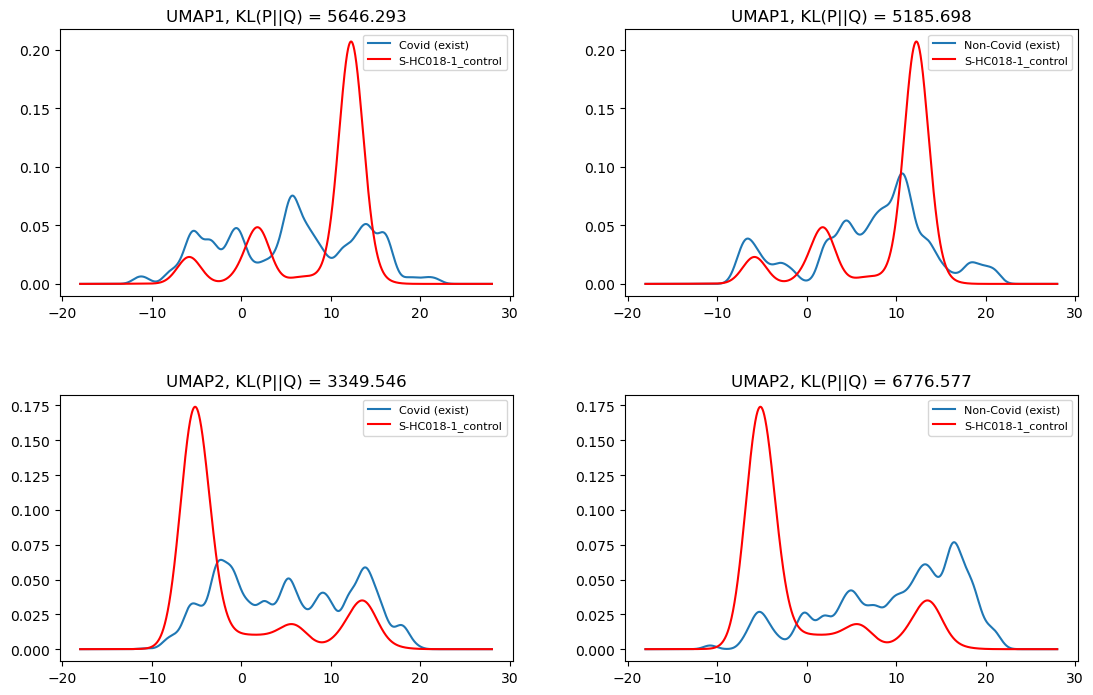

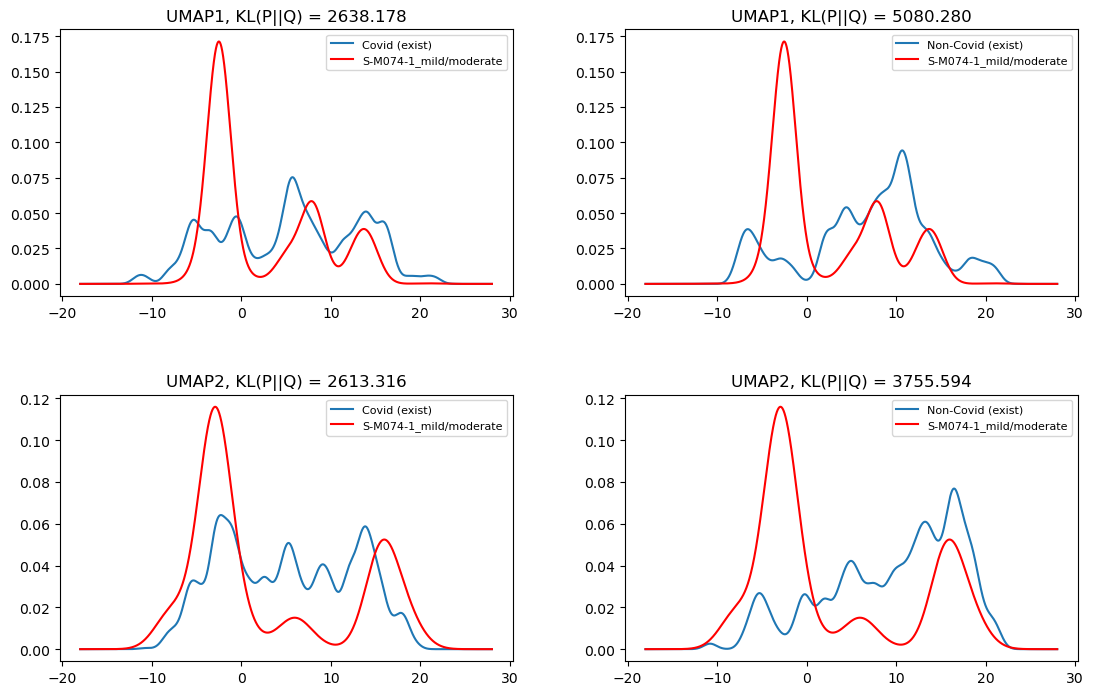

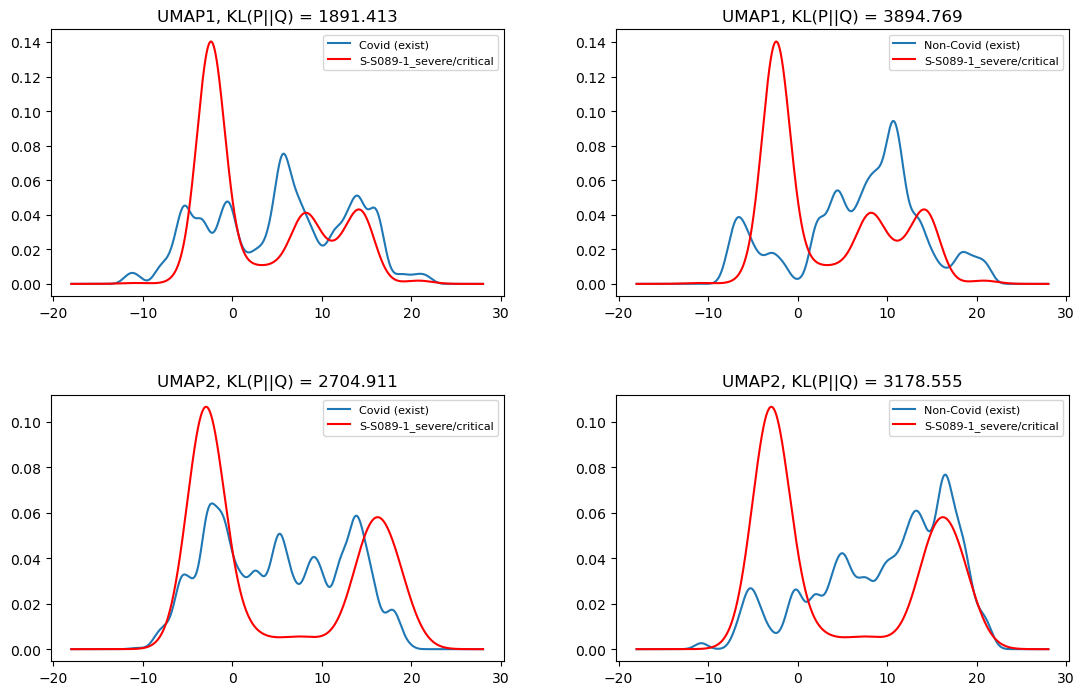

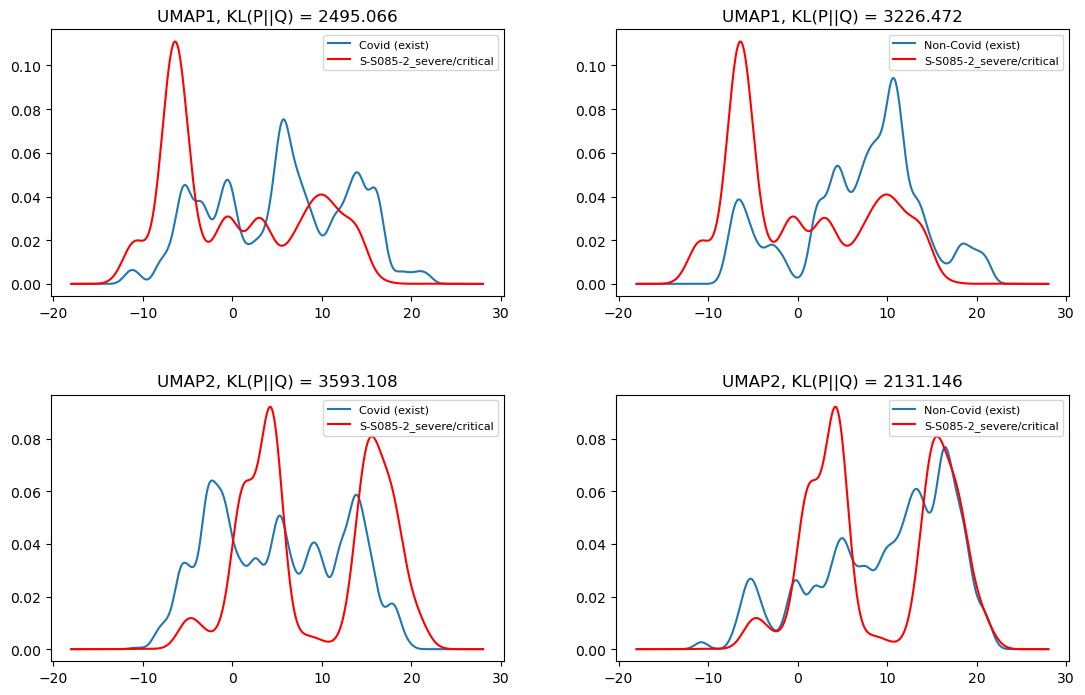

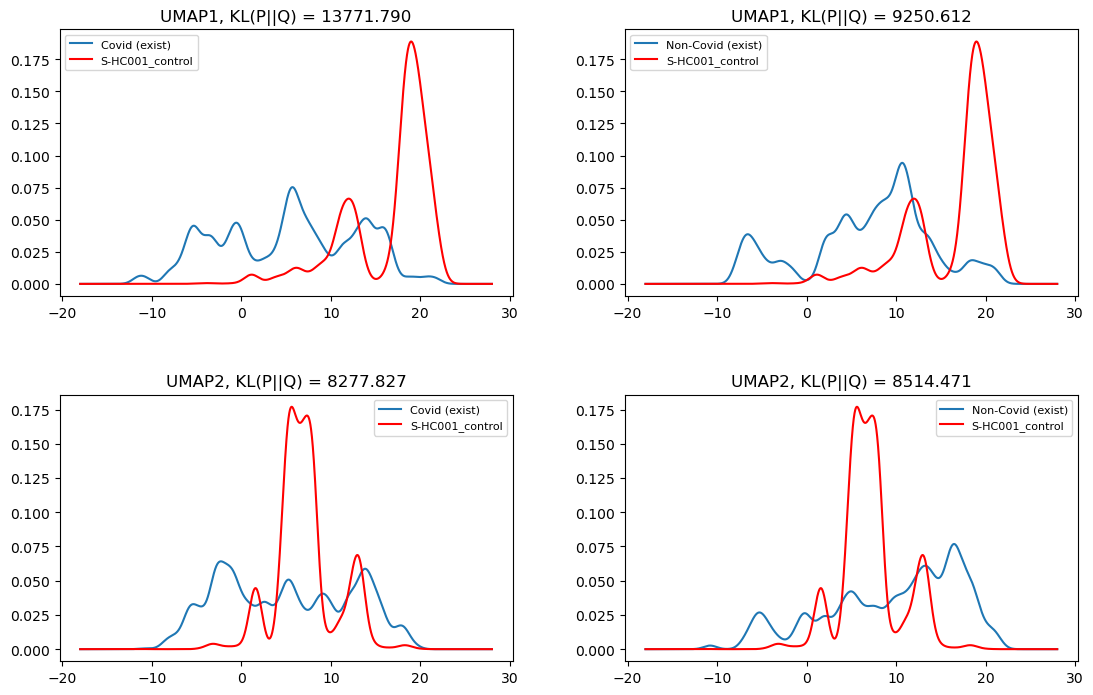

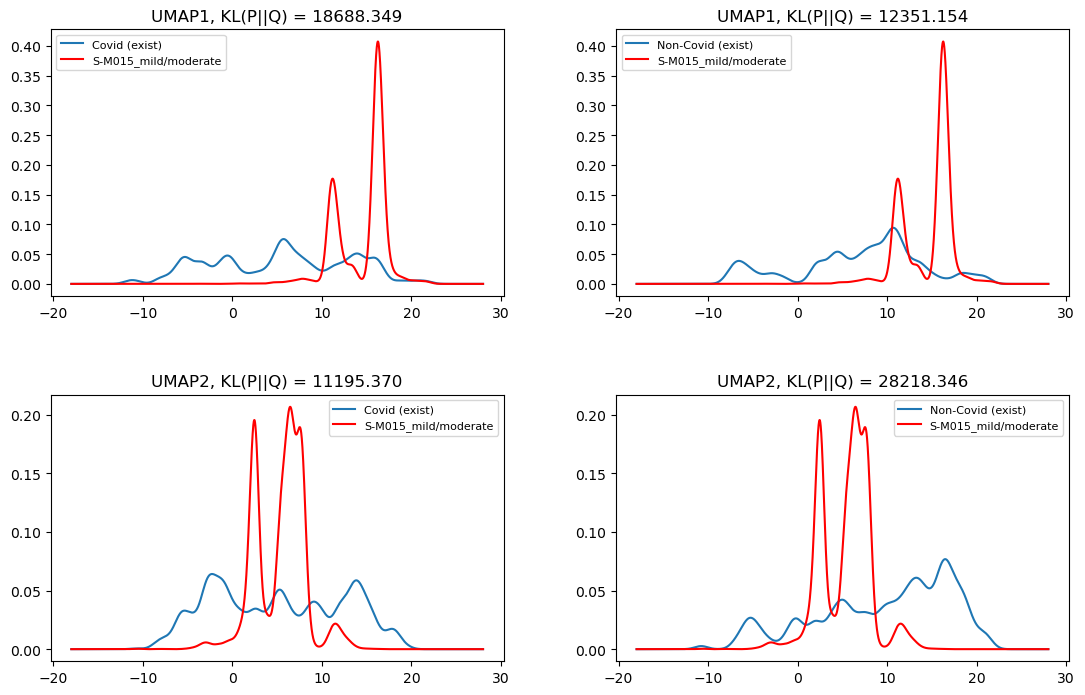

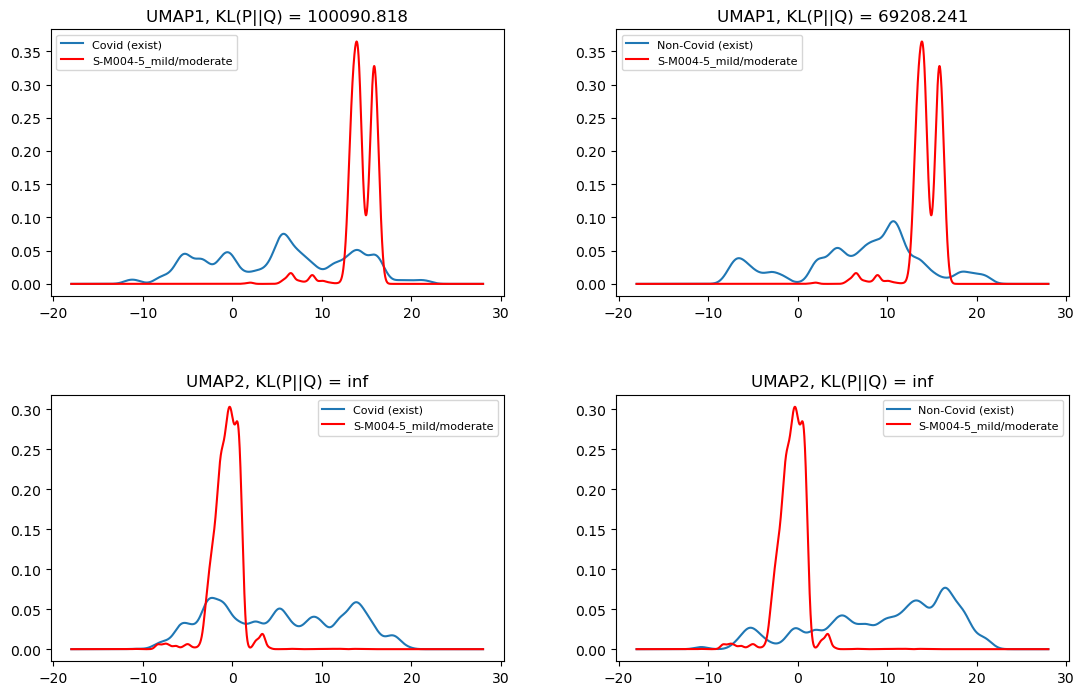

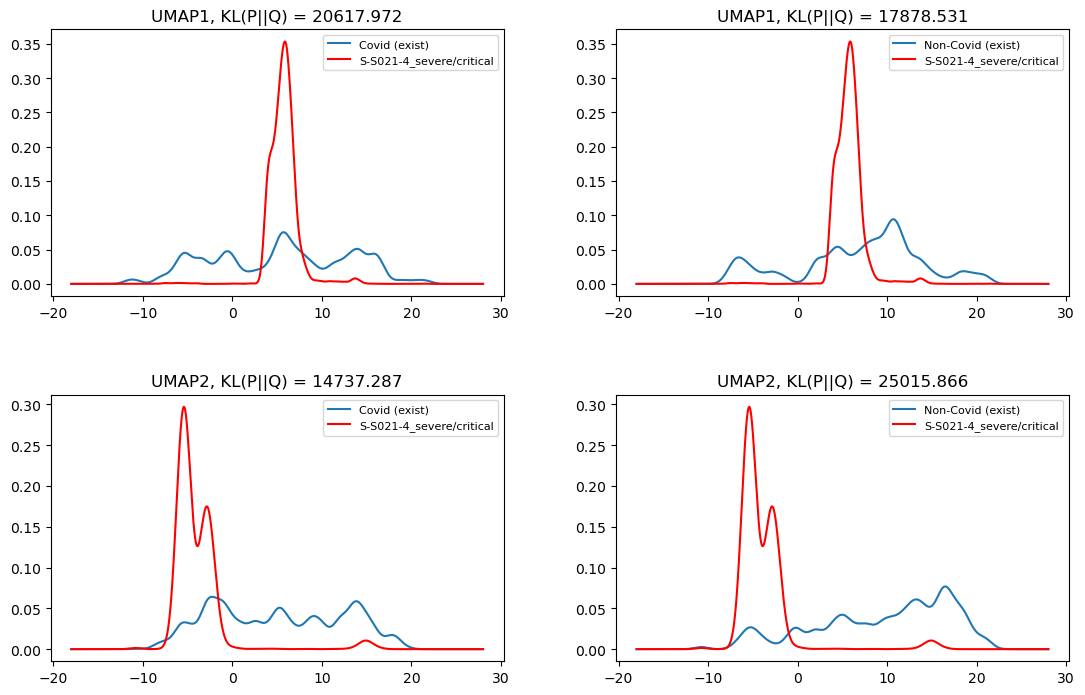

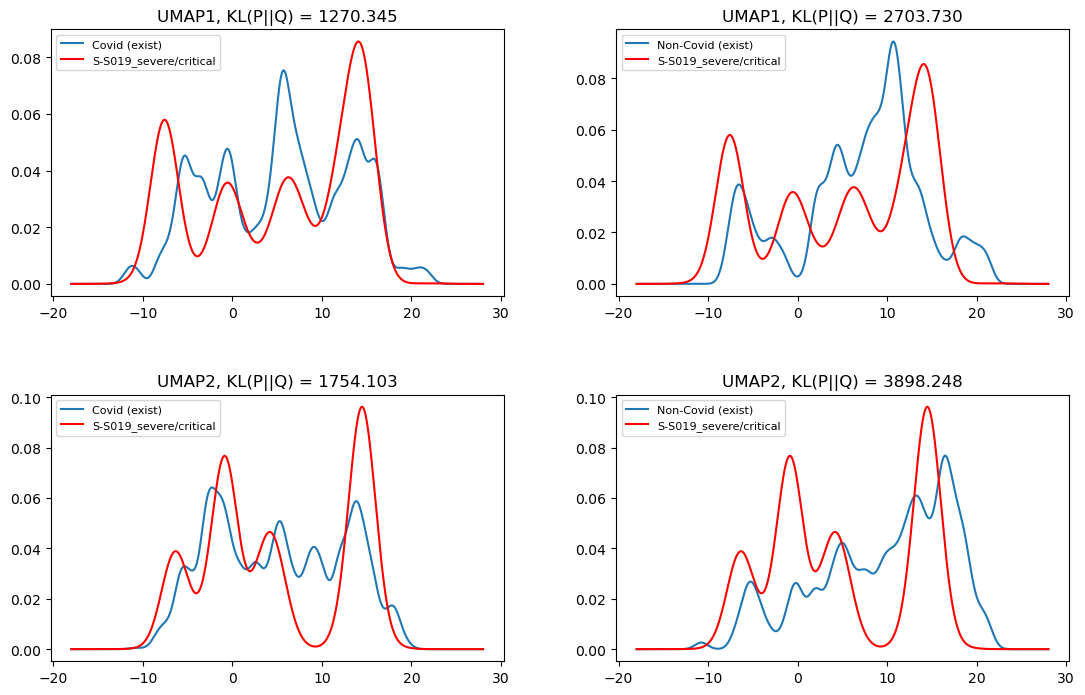

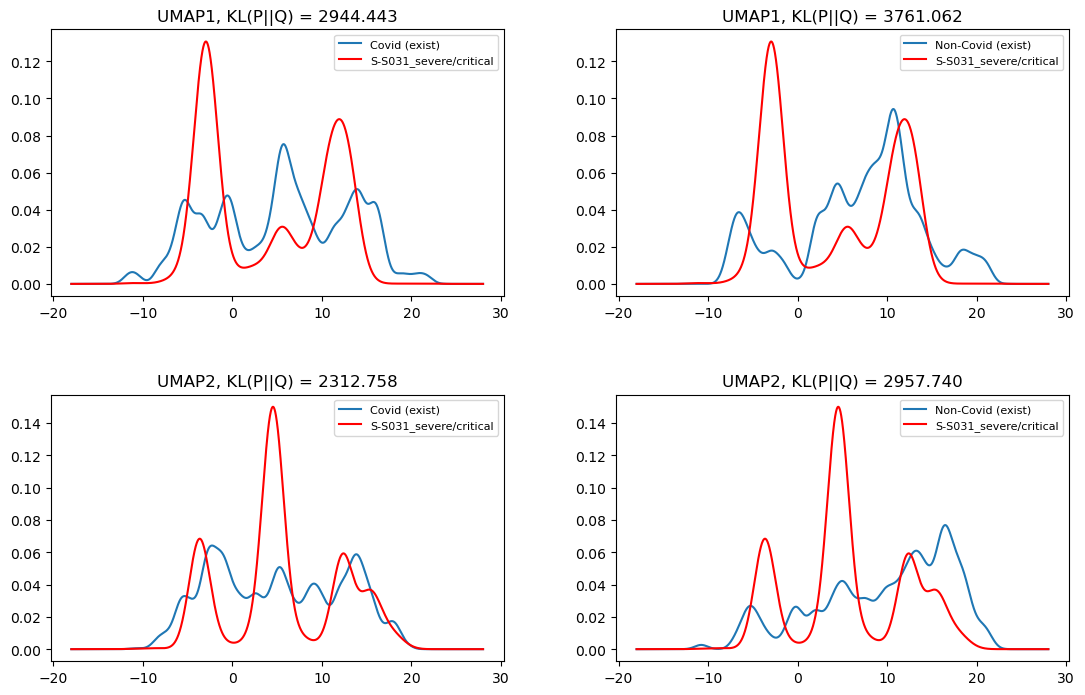

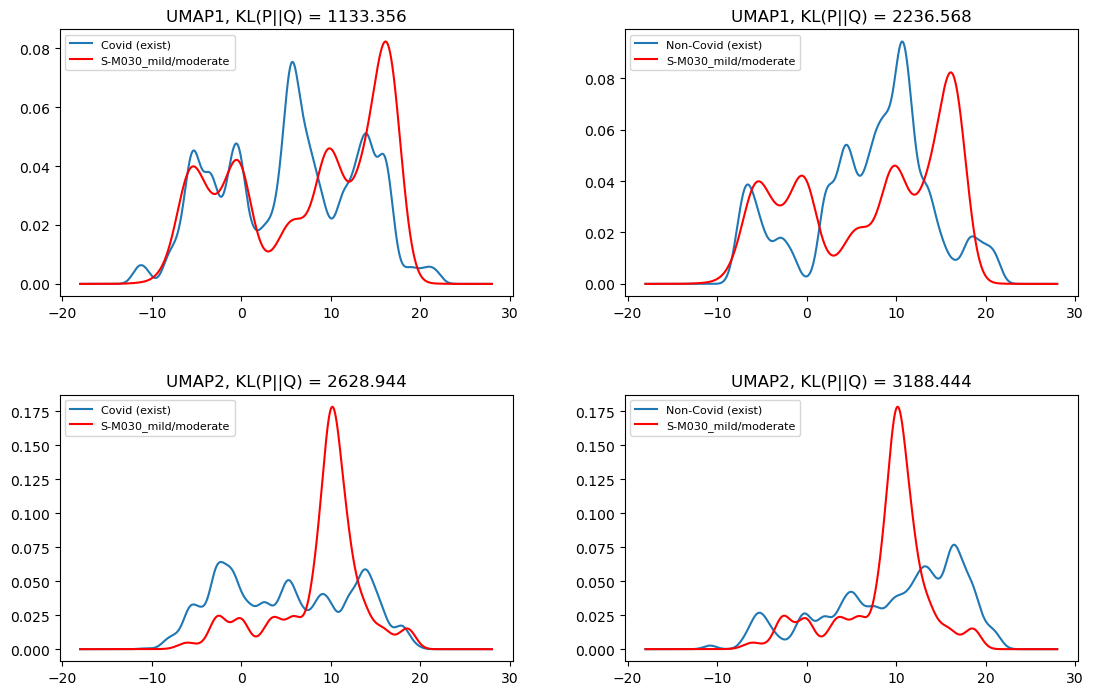

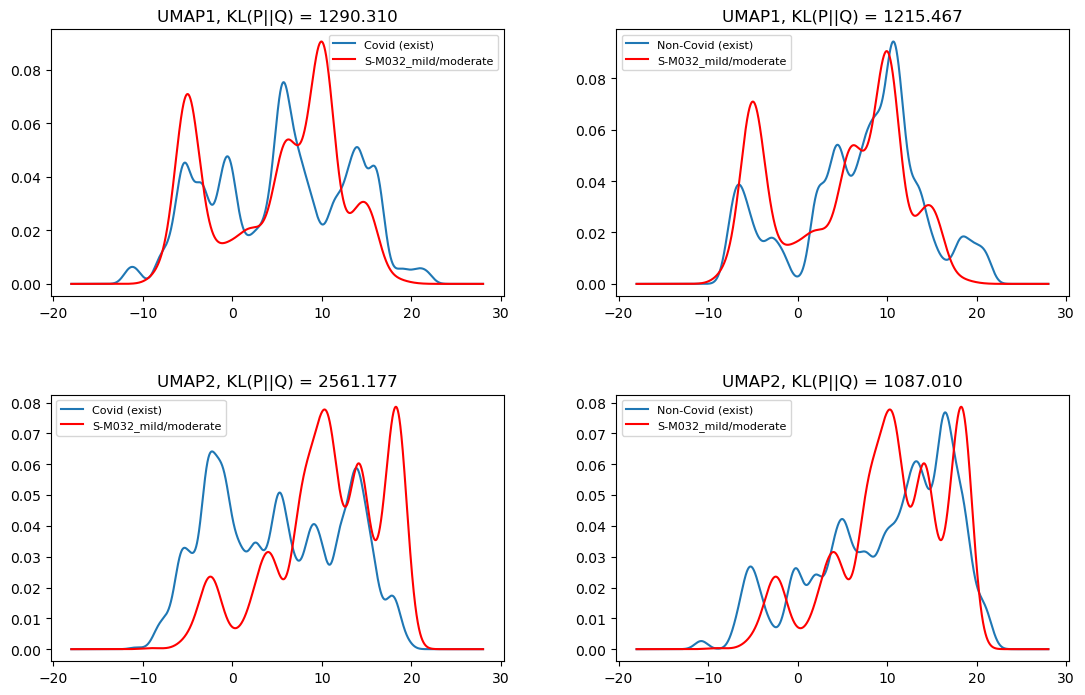

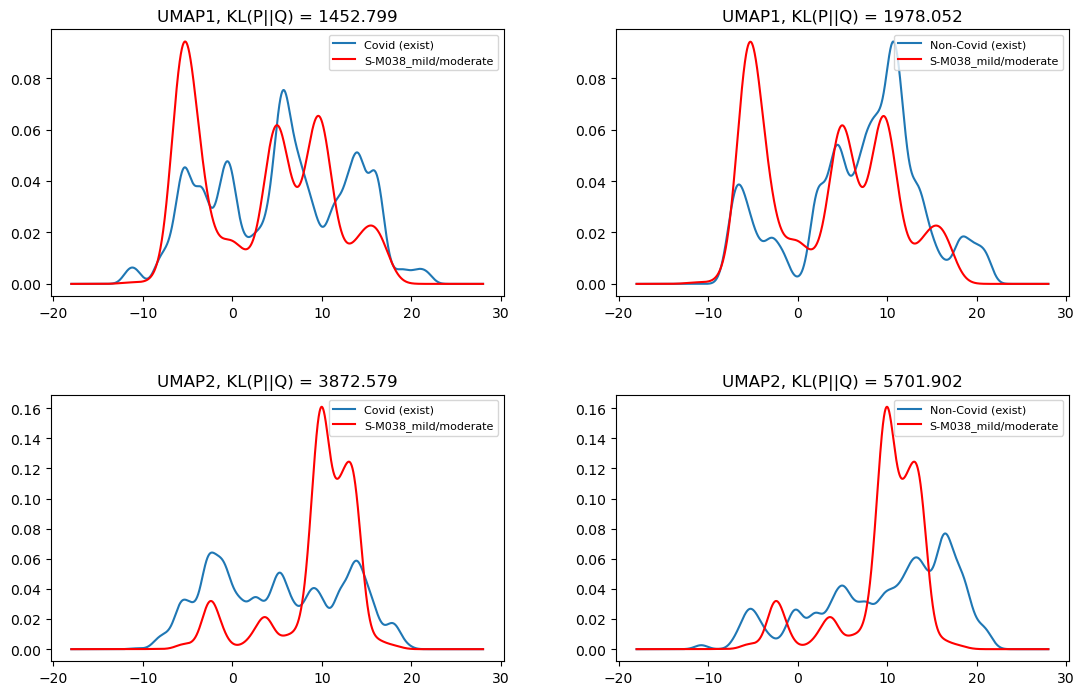

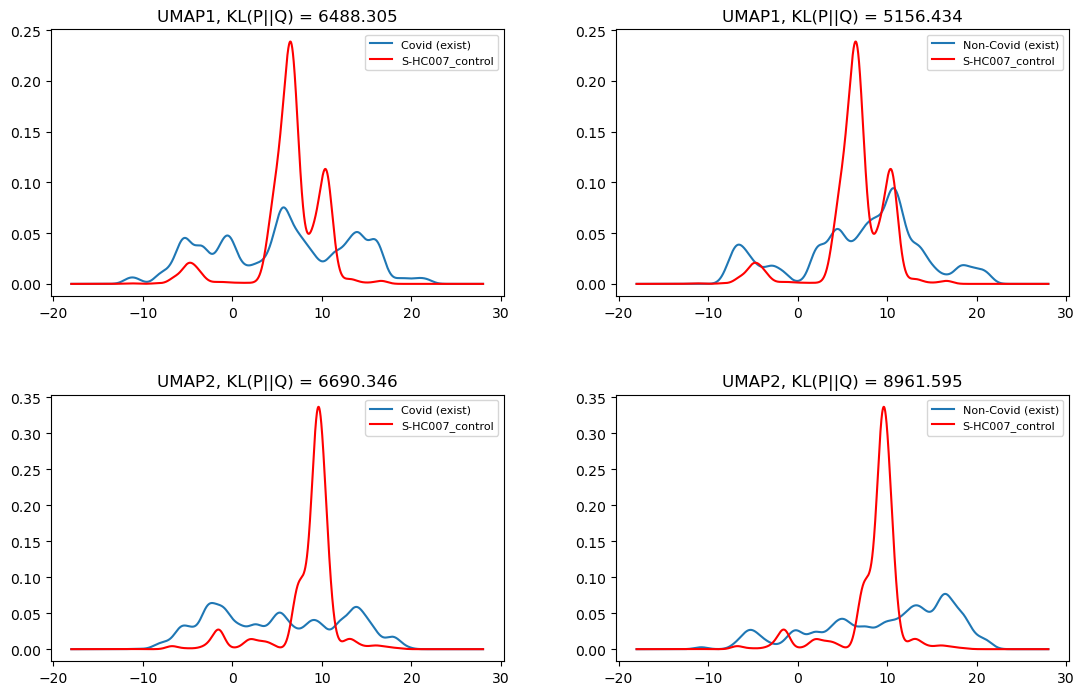

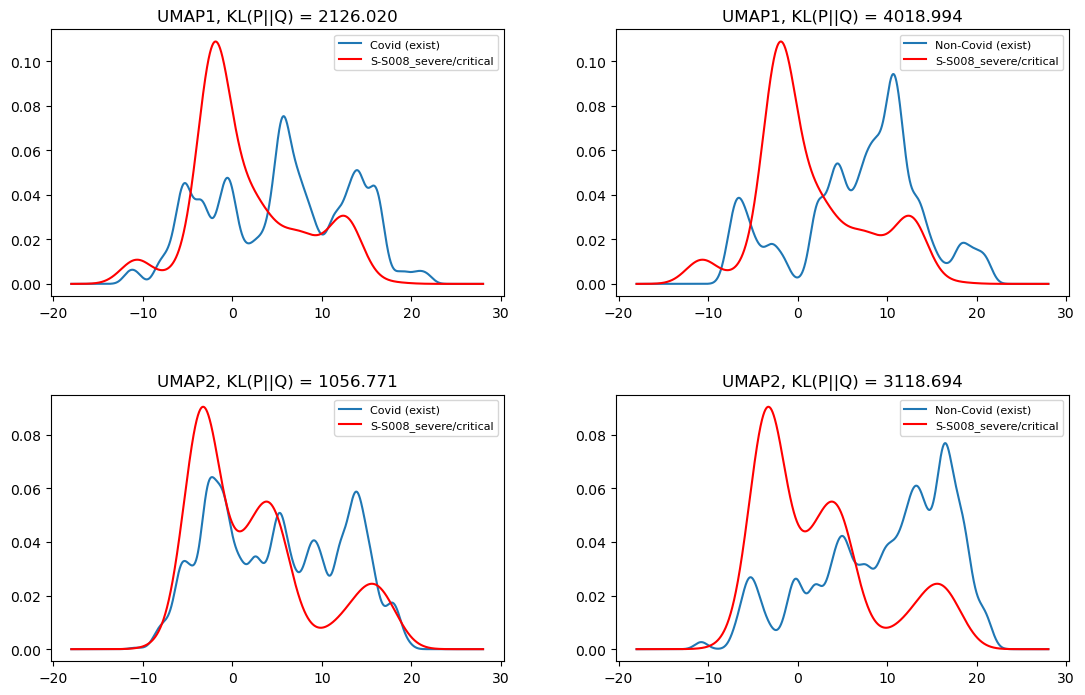

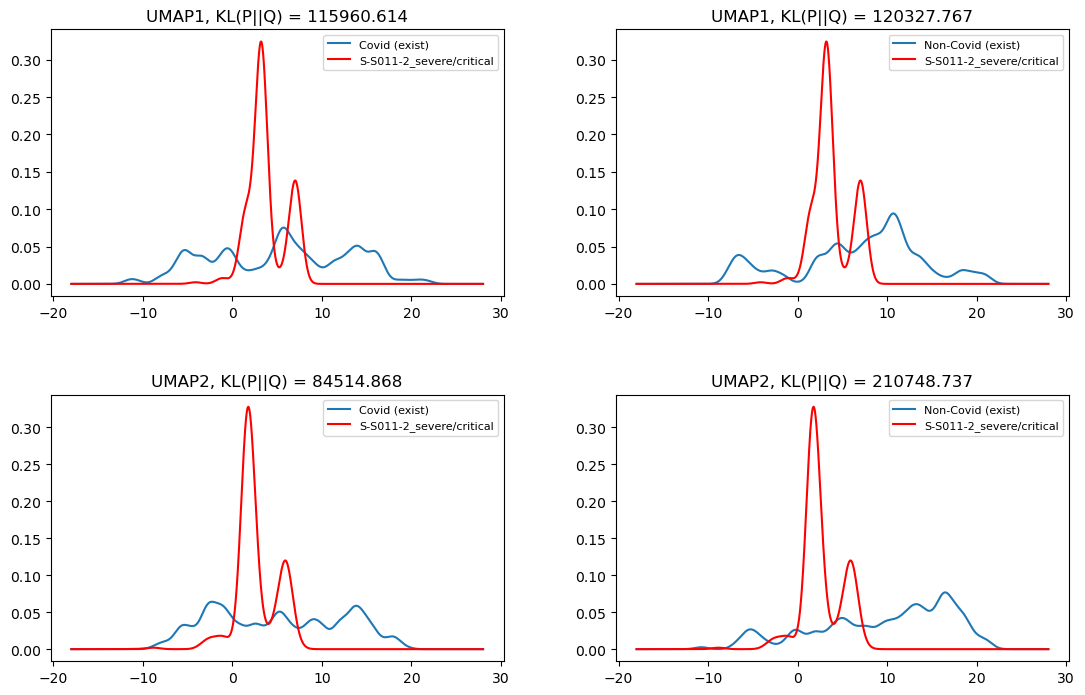

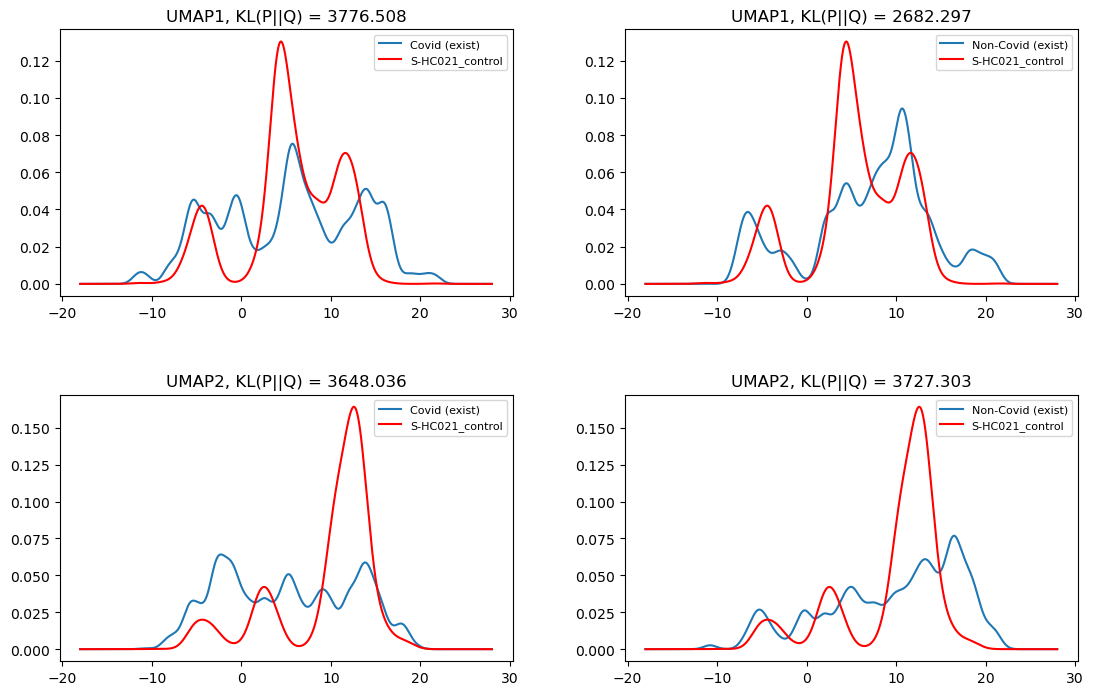

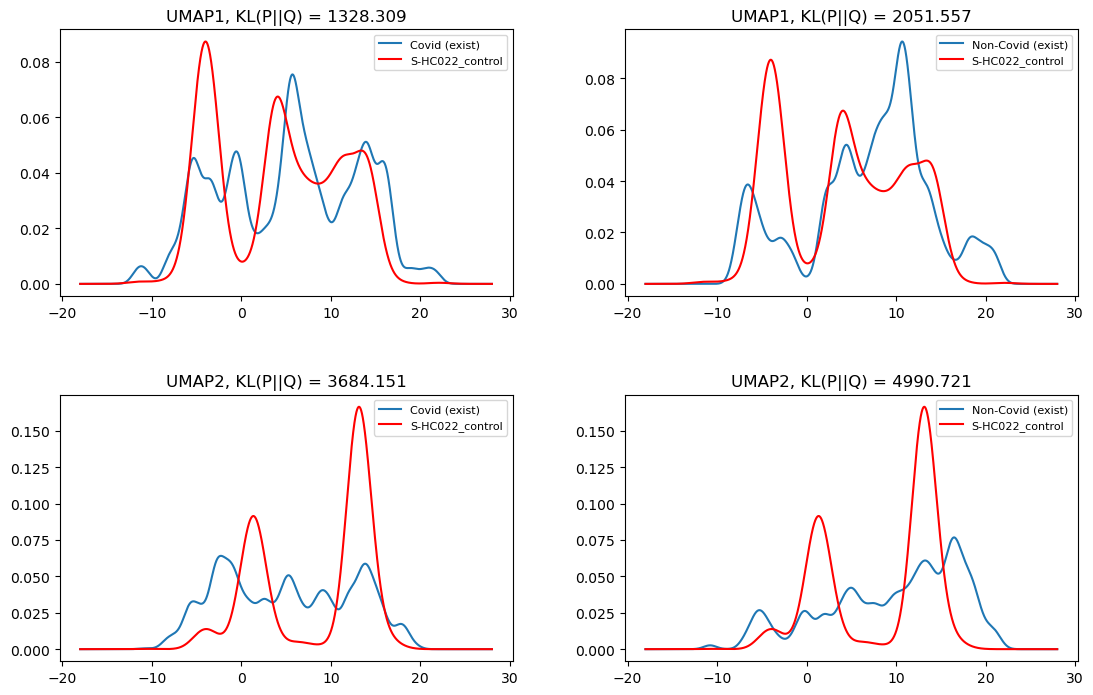

In [26]:
for s, vec in dict_sample_vec.items():
    x_vec = vec[:, 0]
    y_vec = vec[:, 1]

    #Compute kernels of KDE for UMAP1: x-axis and UMAP2: y-axis
    kernel_x = stats.gaussian_kde(x_vec)
    kernel_y = stats.gaussian_kde(y_vec)

    # KDE for UMAP1 (x-axis)
    kde_x_test = kernel_x(n_sample_covid)

    # KDE for UMAP2 (y-axis)
    kde_y_test = kernel_y(n_sample_covid)

    # Get KL-divergence in UMAP 1: x-axis between the existing samples and test sample
    x_KL_d_exis_covid = KL_div(kde_x_covid, kde_x_test)
    x_KL_d_exis_non_covid = KL_div(kde_x_n_covid, kde_x_test)
    # Get KL-divergence in UMAP 2: y-axis between the existing samples and test sample
    y_KL_d_exis_covid = KL_div(kde_y_covid, kde_y_test)
    y_KL_d_exis_non_covid = KL_div(kde_y_n_covid, kde_y_test)

    ### Plot distributions of the existing and test.
    # Initialise the subplot function using number of rows and columns
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.tight_layout(pad=5.0)

    print(f"Existing sample: covid, Test sample: {s} in UMAP1, KL-divergence: {x_KL_d_exis_covid}")
    axes[0,0].set_title('UMAP1, KL(P||Q) = %1.3f' % x_KL_d_exis_covid)  
    axes[0,0].plot(n_sample_covid, kde_x_covid, label='Covid (exist)')  
    axes[0,0].plot(n_sample_covid, kde_x_test, label=f'{s}', color='red')
    axes[0,0].legend(prop={'size': 8})
    print(f"Existing sample: non_covid, Test sample: {s} in UMAP1, KL-divergence: {x_KL_d_exis_non_covid}")
    axes[0,1].set_title('UMAP1, KL(P||Q) = %1.3f' % x_KL_d_exis_non_covid)  
    axes[0,1].plot(n_sample_covid, kde_x_n_covid, label='Non-Covid (exist)')  
    axes[0,1].plot(n_sample_covid, kde_x_test, label=f'{s}', color='red')
    axes[0,1].legend(prop={'size': 8})

    #result_UMAP1_pred[s] = [x_KL_d_exis_covid, x_KL_d_exis_non_covid]

    print(f"Existing sample: covid, Test sample: {s} in UMAP2, KL-divergence: {y_KL_d_exis_covid}")
    axes[1,0].set_title('UMAP2, KL(P||Q) = %1.3f' % y_KL_d_exis_covid)  
    axes[1,0].plot(n_sample_covid, kde_y_covid, label='Covid (exist)')  
    axes[1,0].plot(n_sample_covid, kde_y_test, label=f'{s}', color='red')
    axes[1,0].legend(prop={'size': 8})
    print(f"Existing sample: non_covid, Test sample: {s} in UMAP2, KL-divergence: {y_KL_d_exis_non_covid}")
    axes[1,1].set_title('UMAP2, KL(P||Q) = %1.3f' % y_KL_d_exis_non_covid)  
    axes[1,1].plot(n_sample_covid, kde_y_n_covid, label='Non-Covid (exist)')  
    axes[1,1].plot(n_sample_covid, kde_y_test, label=f'{s}', color='red')
    axes[1,1].legend(prop={'size': 8})
    #fig.savefig(f"../output_pdfs/dist_compare_{s}_GSE159812.pdf", bbox_inches='tight')

    # To produce a final prediction score, we sum up the KL-divergence score 
    # between UMAP1 and UMAP2, and then divide by 2 to get an average of UMAP1 and UMAP2.
    result_pred[s] = [(x_KL_d_exis_covid+y_KL_d_exis_covid)/2, (x_KL_d_exis_non_covid+y_KL_d_exis_non_covid)/2]

print("--------Done computing KL-divergence with new samples--------")
print("result_pred:", result_pred)

Pick up the index which has the minimum value from each result.

-> If the KL divergence between two distributions is zero, then it indicates that the distributions are identical. Thus, the smaller value is better.

In [28]:
result_pred

{'S-HC018-1_control': [4497.919318073002, 5981.1372609438195],
 'S-M074-1_mild/moderate': [2625.7466143408437, 4417.937082048251],
 'S-S089-1_severe/critical': [2298.1617947814043, 3536.6617731235974],
 'S-S085-2_severe/critical': [3044.0872855471252, 2678.809262263947],
 'S-HC001_control': [11024.808866717656, 8882.541553236919],
 'S-M015_mild/moderate': [14941.859788260106, 20284.749796334276],
 'S-M004-5_mild/moderate': [inf, inf],
 'S-S021-4_severe/critical': [17677.629621020264, 21447.198324175806],
 'S-S019_severe/critical': [1512.2239047597116, 3300.9892746641112],
 'S-S031_severe/critical': [2628.6003857748756, 3359.40076328503],
 'S-M030_mild/moderate': [1881.1497174738179, 2712.5056374823666],
 'S-M032_mild/moderate': [1925.743296891015, 1151.238364638231],
 'S-M038_mild/moderate': [2662.688873855157, 3839.9769321558583],
 'S-HC007_control': [6589.325577831648, 7059.014467846419],
 'S-S008_severe/critical': [1591.3956330452634, 3568.844158292109],
 'S-S011-2_severe/critical':

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_true = [] # Covid = 0, Non-Covid = 1
y_pred = []

for key, value in result_pred.items():
    if "mild/moderate" in key or "severe/critical" in key:
        y_true.append(0)
    else:
        y_true.append(1)

    #print(value)
    y_pred.append(np.argmin(value))

print("Accuracy =", accuracy_score(y_true, y_pred))
print("Precision = ", precision_score(y_true, y_pred, average='macro'))
print("Recall = ", recall_score(y_true, y_pred, average='macro'))
print("f1 score = ", f1_score(y_true, y_pred, average='macro'))

Accuracy = 0.7222222222222222
Precision =  0.6428571428571428
Recall =  0.6230769230769231
f1 score =  0.6296296296296297
